# 1. Importing Libaries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# checking matplotlib version

matplotlib.__version__

'3.7.0'

In [3]:
%matplotlib inline

In [4]:
# importing data

path = r'C:\Users\Charles Yi\A6\02 Data\Prepared'
df = pd.read_pickle(os.path.join(path, 'df_2012.pkl'))

In [5]:
df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990


# 2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

In [6]:
# creating sub data with numeric variables only

df_sub = df.drop(columns = ['Country Name', 'Regional Indicator', 'Year'])

df_sub.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048
7,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557
8,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990


# 3. Create a correlation matrix heatmap (colored)

Text(0.5, 1.0, 'Correlation Matrix Heatmap : World Happiness Report')

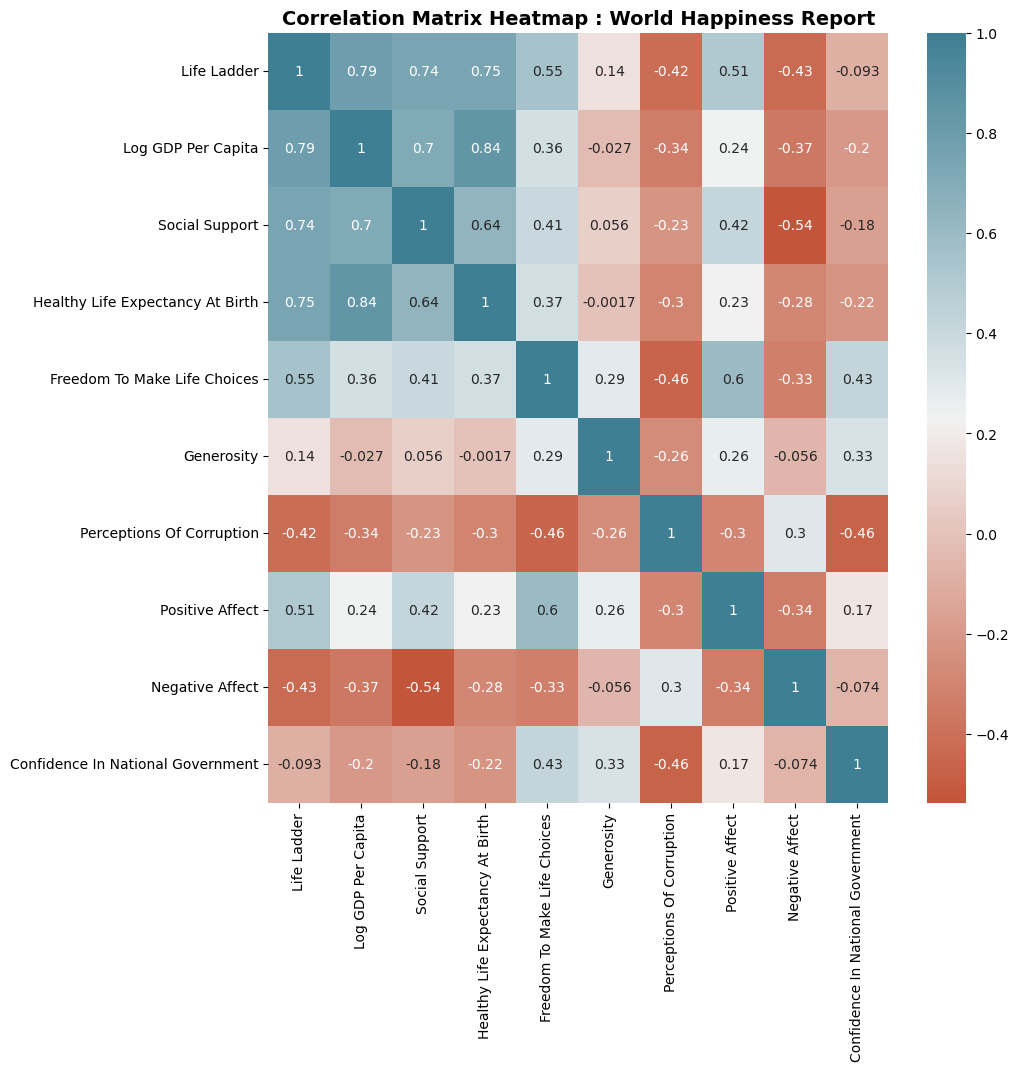

In [7]:
# creating subplot
f,ax = plt.subplots(figsize=(10,10))

# defining color
cmap=sns.diverging_palette(20, 220, n=200)

# creating matrix
corr = sns.heatmap(df_sub.corr(), annot = True, ax=ax, cmap = cmap)

# adding title
plt.title('Correlation Matrix Heatmap : World Happiness Report', fontweight = 'bold', fontsize = 14)

**Findings:** I'm mainly interested in how the variables influence 'Life Ladder', the metric that compares happiness across countries. Life Ladder has moderate to strong positive correlations with GDP per capita, social support, life expectancy, positive affect (the frequency of positive emotions). 

On the other hand, Life Ladder has moderate negative correlations with perceptions of corruption and negative affect.

The remaining variables, including generosity and confidence in national government, seems to have weak correlations with Life Ladder.

# 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

## 4a. Scatterplot of Life Ladder and GDP per capita

Text(0.5, 1.0, 'Life Ladder / GDP Per Capita')

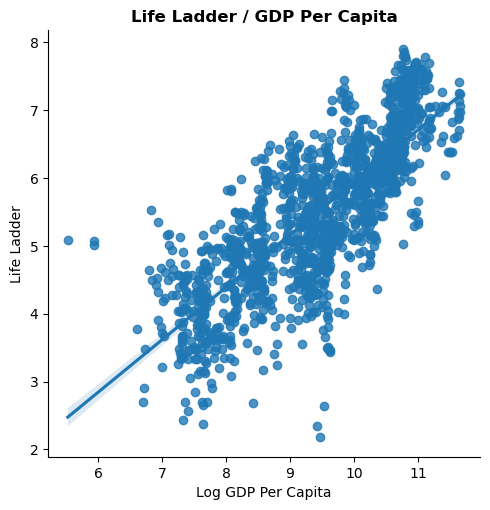

In [8]:
sns.lmplot(data = df_sub, x = 'Log GDP Per Capita', y = 'Life Ladder')

# title
plt.title('Life Ladder / GDP Per Capita', fontweight = 'bold')

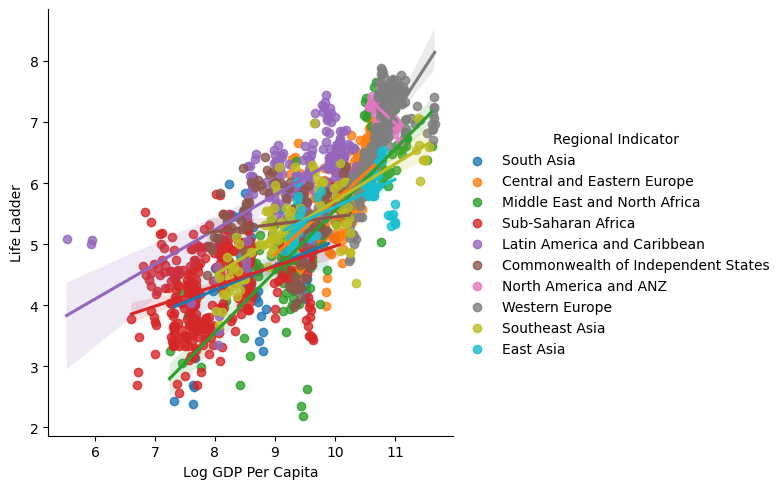

In [9]:
# adding region as hue

sns.lmplot(data = df, x = 'Log GDP Per Capita', y = 'Life Ladder', hue = 'Regional Indicator')

**Findings:** The scatterplot exhibits a linear relationship between the two variables. In addition, the trend line is steep, reflecting a close relationship between the variables. However, the data points are more tightly clustered around the trend line as GDP per capita increase. On the contrary, data points become more scattered as the GDP decreases. There are a number of outliers on both the low and mid-to-high GDP per capita ranges, although the outliers are not present at the highest ranges of GDP per capita.

In the hue scatterplot, Western Europe displays the strong relationship between GDP per capita and life ladder. On the other hand and notably, the relationship seems quite sharply reversed in North America and ANZ.

## 4b. Scatterplot of Life Ladder and Social Support

Text(0.5, 1.0, 'Life Ladder / Social Support')

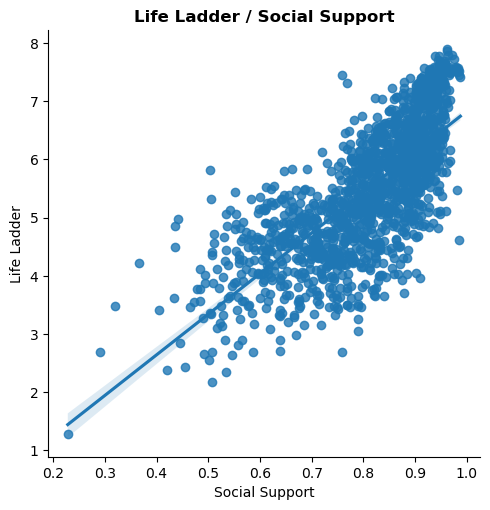

In [10]:
sns.lmplot(data = df_sub, x = 'Social Support', y = 'Life Ladder')

# title

plt.title('Life Ladder / Social Support', fontweight = 'bold')

**Findings:** The scatterplot exhibits a similar trend to the first plot. The trend line is sharp and the plot demonstrates a linear relationship. However, the data points are scattered at the lower ranges of social support. There are also a lot more outliers on the lower left side of plot. As social support increases, the linear relationship intensifies. In fact, the linear relationship seems to increase once social support rises above 0.8. This could indicate that social support has a compounding, or exponential, relationship on life ladder. A closer study of the outliers could reveal what's causing such deviations from the trend line.

# 4c. Scatterplot of Life Ladder and Life Expectancy

Text(0.5, 1.0, 'Life Ladder / Life Expectancy')

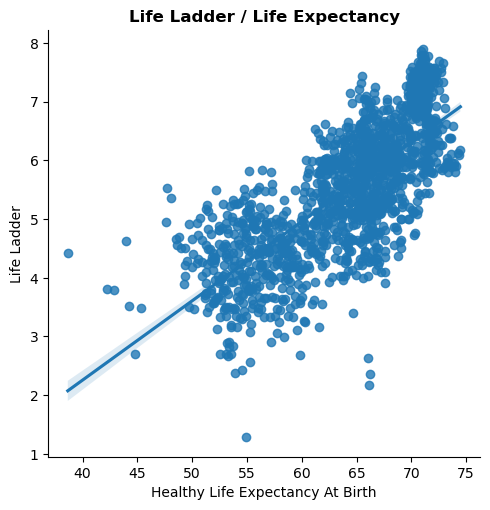

In [11]:
sns.lmplot(data = df_sub, x = 'Healthy Life Expectancy At Birth', y = 'Life Ladder')

# title
plt.title('Life Ladder / Life Expectancy', fontweight = 'bold')

**Findings:** Similiar to the above graphs, there is more variation in the lower left section of the plot. As life expectancy increase, the linear relationship deepens.

# 5. Create a pair plot of the entire data set.

In [12]:
# creating sub data with variables with moderate-to-strong relationships

sub_2 = df_sub.drop(columns = ['Generosity', 'Confidence In National Government'])

sub_2.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Positive Affect,Negative Affect
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.775620,0.613513,0.267919
5,3.572100,7.680333,0.483552,52.000000,0.577955,0.823204,0.547417,0.273328
6,3.130896,7.670638,0.525568,52.299999,0.508514,0.871242,0.491641,0.374861
7,3.982855,7.653833,0.528597,52.599998,0.388928,0.880638,0.491410,0.339276
8,4.220169,7.650370,0.559072,52.924999,0.522566,0.793246,0.501409,0.348332


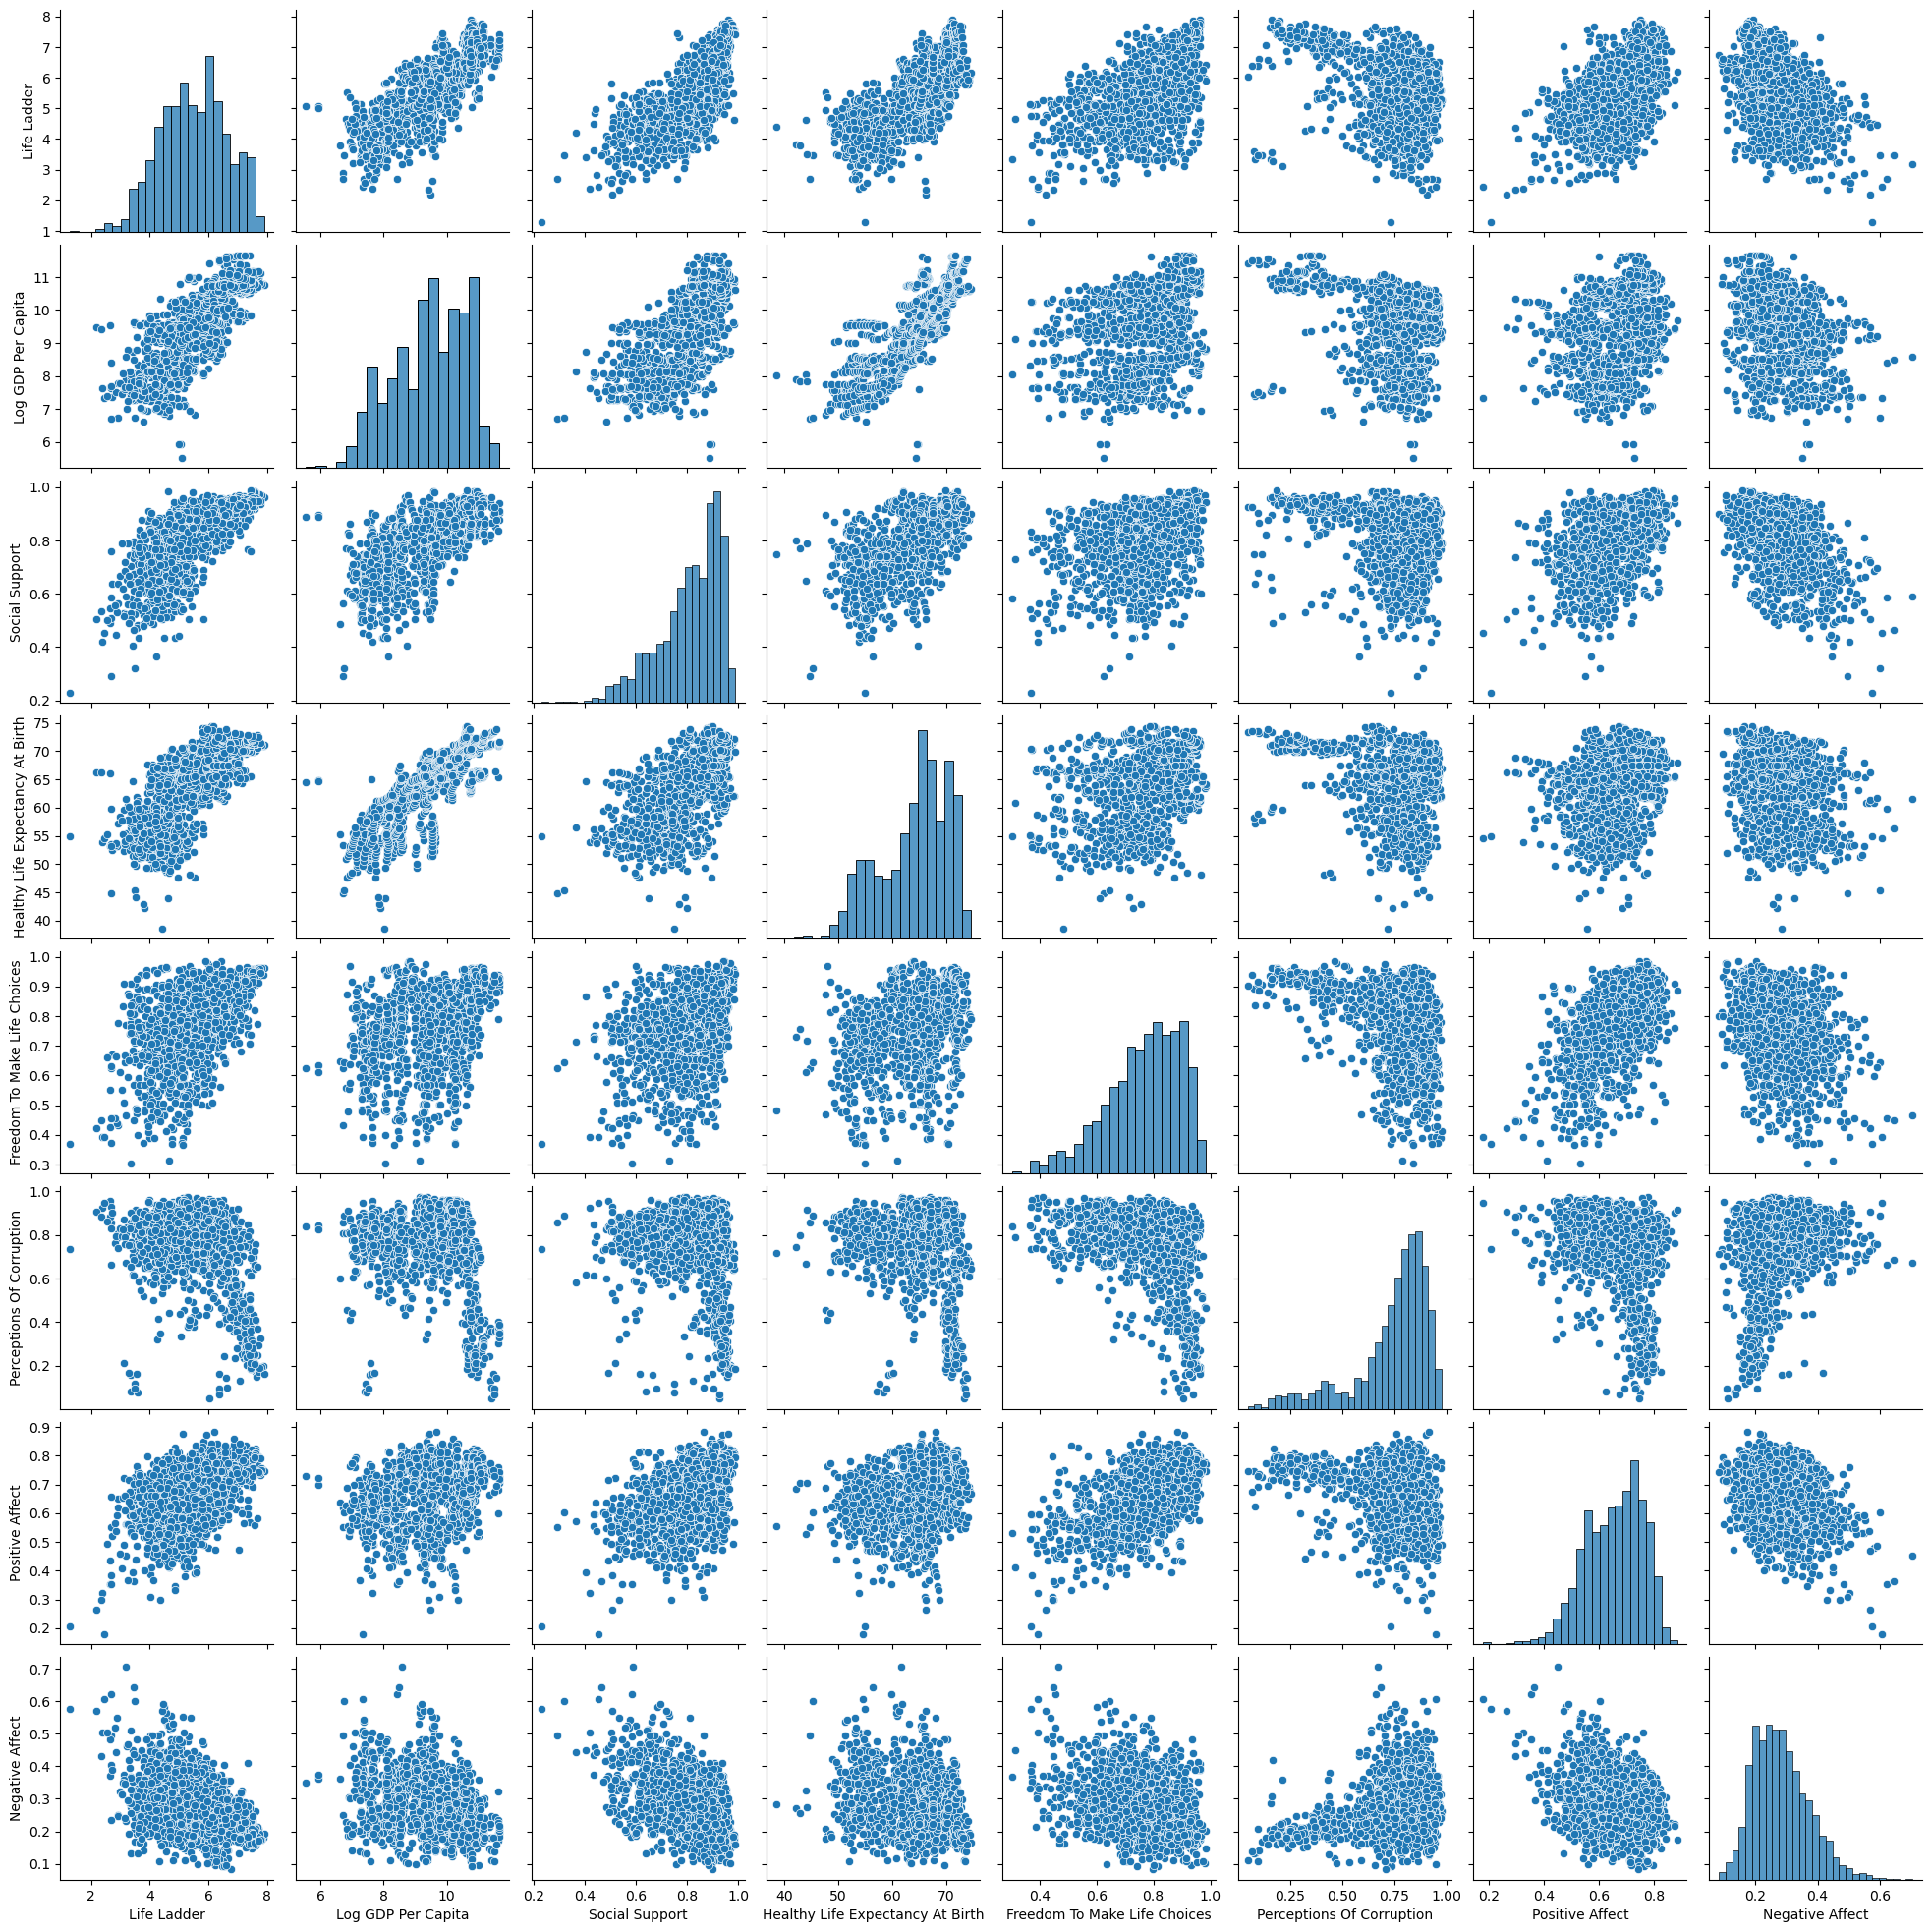

In [13]:
# creating pairplot

sns.pairplot(sub_2)

**Findings:** What sticks out is that many of the histograms are skewed to the left. Could this in someway contribute to the presence of outliers at the lower ranges of some of the independent variables that were examined in scatterplots? Alternatively, this could suggest bias in the data. For example, in the life expectancy histogram, the values are concentrated to the right, indicating that most of the countries surveyed had life expectancies higher than the median. This could be because the countries that participated the most in the report were well-developed countries with robust and accessible healthcare. I'd be interested in investigating year-to-year variations of the histograms of some of these variables. I'd also be interested in examining the ratio of first-world and third world countries that contributed data to the report. As a matter of fact, analyzing trends by reigon and economic status could be a good way to handle the report.

# 6. Create a categorical plot and interpret the results.

## 6a. Categorical Plot of Regions and Life Ladder

<Axes: xlabel='Life Ladder', ylabel='Count'>

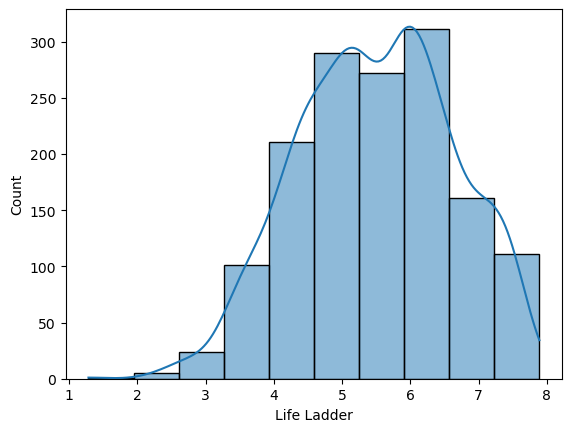

In [14]:
# histogram of life ladder

sns.histplot(df['Life Ladder'], bins = 10, kde = True)

In [15]:
# life ladder stats

df['Life Ladder'].describe()

count    1487.000000
mean        5.492837
std         1.135839
min         1.281271
25%         4.646750
50%         5.501249
75%         6.321120
max         7.889350
Name: Life Ladder, dtype: float64

**categories for life ladder**

low happiness: < 3  

mid happiness: >= 3 AND < 7 

high happiness: >=7

In [16]:
# creating categories for life ladder

def happiness_flag (row):
    if row < 4:
        return 'Low Happiness'
    elif row >= 4 and row < 7:
        return 'Mid Happiness'
    elif row >= 7:
        return 'High Happiness'
    
# applying to df

df['Happiness Category'] = df['Life Ladder'].apply(happiness_flag)

df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Happiness Category
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,Low Happiness
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847,Low Happiness
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048,Low Happiness
7,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557,Low Happiness
8,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990,Mid Happiness


In [17]:
# count of happiness category values

df['Happiness Category'].value_counts()

Mid Happiness     1179
High Happiness     162
Low Happiness      146
Name: Happiness Category, dtype: int64

C:\Users\Charles Yi\AppData\Local\Temp\ipykernel_30576\4187243979.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, ha='right', rotation = 45)


[Text(0, 0, 'South Asia'),
 Text(1, 0, 'Central and Eastern Europe'),
 Text(2, 0, 'Middle East and North Africa'),
 Text(3, 0, 'Sub-Saharan Africa'),
 Text(4, 0, 'Latin America and Caribbean'),
 Text(5, 0, 'Commonwealth of Independent States'),
 Text(6, 0, 'North America and ANZ'),
 Text(7, 0, 'Western Europe'),
 Text(8, 0, 'Southeast Asia'),
 Text(9, 0, 'East Asia')]

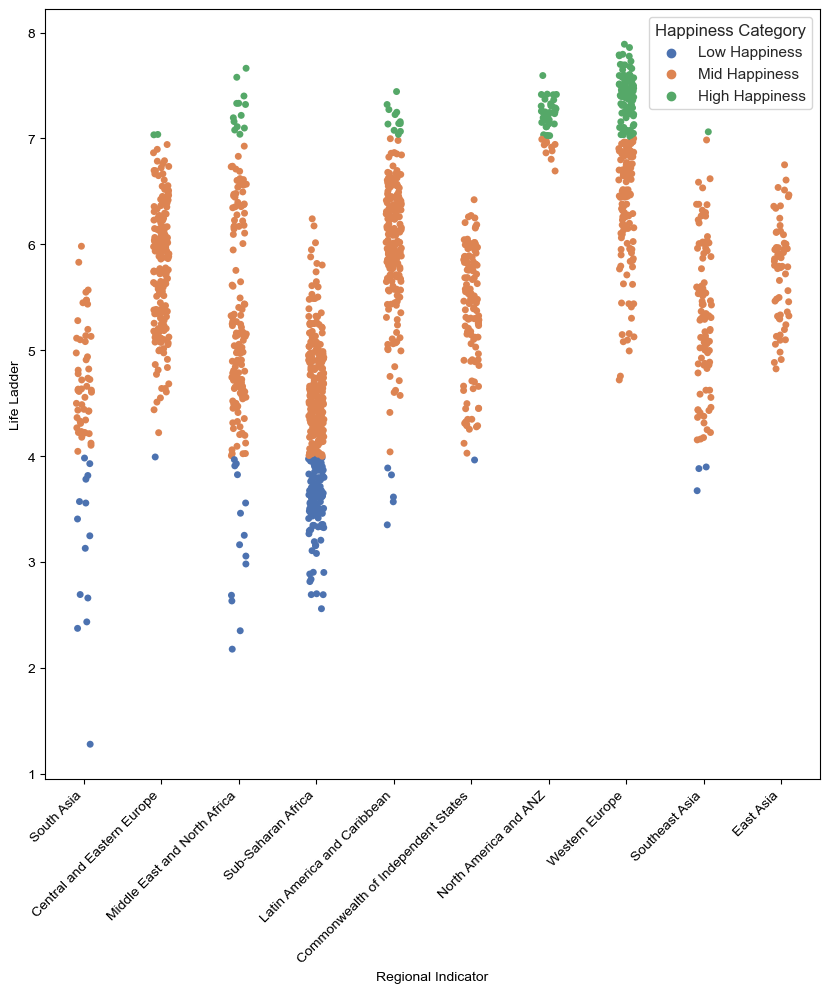

In [18]:
# creating catplot

f, ax = plt.subplots(figsize = (10, 10))

sns.set(style="ticks")
sns.stripplot(x="Regional Indicator", y="Life Ladder", hue='Happiness Category', data=df, ax = ax)

# adjust x-ticks

x_labels = df['Regional Indicator'].unique()

ax.set_xticklabels(x_labels, ha='right', rotation = 45)

**Finding:** Western Europe and North America have the highest proportion of happy countries. Sub-Saharan Africa has the highest concentration of unhappy countries. East Asia has only countries in the mid-happiness range, which is suprising considering the region consists of relatively advanced economies, exluding North Korea.

# 7. Define any hypotheses that you can at this point. You’ll be testing these later on.

Hypothesis 1 : In countries with high levels of happiness, the correlation between Life Ladder and other metrics will be greater than in countries with medium and low levels of happiness. Scatterplots seemed to show an intensifying linear relationship between the variables as Life Ladder increased.

Hypothesis 2 : Countries with high levels of GDP per capita, life expectancy, and social support will rank higher in Life Ladder than in countries with low values in the aforementioned metrics. According to the scatterplots, there is a strong correlation between Life Ladder and these variables, although the existence or direction of a casual relationship is unclear.

Hpothesis 3 : The correlation between Life Ladder and other variables will fluctuate across regions. This could help uncover whether different regions value certain factors over others when assessing life satisfaction.